In [6]:
import pandas as pd
from collections import Counter

dog_data = pd.read_csv("dog_open_ended.csv")
for q_num in ["Q1", "Q3", "Q4", "Q12", "Q10", "Q6"]:
    n_examples = len(dog_data[q_num][4:])
    c = Counter([item.strip().lower() for item in dog_data[q_num][4:]])
    print(q_num,
          [(w, count, round(count / n_examples, 3)) for w, count in c.most_common(20)])

Q1 [('dog', 94, 0.468), ('dalmatian', 89, 0.443), ('spotted dog', 2, 0.01), ('dalmatian dog', 2, 0.01), ('puppy', 1, 0.005), ('that’s a nice dalmatian.', 1, 0.005), ('white and black spotted dog', 1, 0.005), ('the dog', 1, 0.005), ('cute dog', 1, 0.005), ('the dalmatian', 1, 0.005), ('firehouse dog', 1, 0.005), ('movie', 1, 0.005), ('spotted', 1, 0.005), ('same dog', 1, 0.005), ('that dog', 1, 0.005), ('horse', 1, 0.005), ('cat', 1, 0.005), ('...[a] dog that looks like a dalmatian...', 1, 0.005)]
Q3 [('dog', 116, 0.577), ('dalmatian', 19, 0.095), ('doggy', 15, 0.075), ('spotted dog', 7, 0.035), ('doggie', 7, 0.035), ('puppy', 6, 0.03), ('cat', 4, 0.02), ('white dog with black spots', 2, 0.01), ('same dog', 2, 0.01), ('black and white dog', 2, 0.01), ('dalmatian dog, the one with the spots', 1, 0.005), ('dog or doggie', 1, 0.005), ('spoyted dog', 1, 0.005), ('sog', 1, 0.005), ('white and black spotted dog', 1, 0.005), ('dog with spots on it', 1, 0.005), ('dalmatian dog with black spots'

In [27]:
# Compute proportion modified

import pandas as pd
from collections import Counter

dog_data = pd.read_csv("dog_open_ended.csv")
for q_num in ["Q1", "Q3", "Q4", "Q12", "Q10", "Q6"]:
    n_examples = len(dog_data[q_num][4:])
    proportion_modified = len([item for item in dog_data[q_num][4:] if len(item.split()) > 1])
    print(q_num, round(proportion_modified / n_examples, 3))

Q1 0.065
Q3 0.144
Q4 0.1
Q12 0.532
Q10 0.05
Q6 0.453


In [129]:
import matplotlib.pyplot as plt
import numpy as np


def make_pie_plot(labels, scores, add_other=False):
    LABEL_TO_COLOR = {
        "dog": "lightskyblue",
        "dalmatian": "lightgreen",
        "spotted dog": "plum",
        "other": "lightgray",
        "small dog": "salmon",
        "pug": "moccasin",
        "doggy": "gold",
        "black and white dog": "pink",
        "little dog": "cornflowerblue"
    }
    if add_other:
        labels.append("other")
        scores.append(100 - np.sum(scores))
        
    def generate_label(percentage):
        percentage_i, curr_percentage = 1000, None
        for i in range(0, len(scores)):

            percentage_i, curr_percentage = 0, scores[0]
            if abs(scores[i] - percentage) < abs(curr_percentage - percentage):
                percentage_i, curr_percentage = i, scores[i]
        return f'{labels[percentage_i]}\n{percentage:.1f}%'
    
    plt.pie(
        scores,
        #labels=labels,
        autopct=generate_label,
        colors=[LABEL_TO_COLOR[label] for label in labels])
    plt.show()





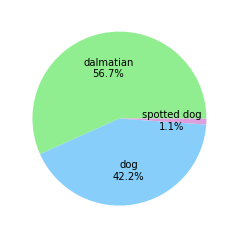

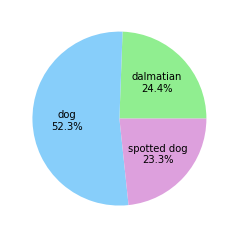

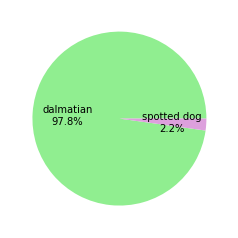

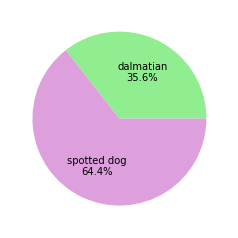

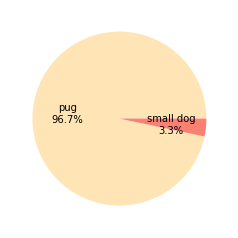

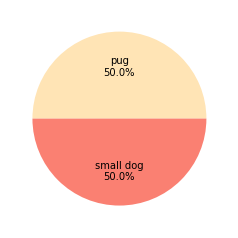

In [2]:
# Multiple choice answers

import visualizations


visualizations.make_pie_plot(
    {"dog": 42.2,
     "dalmatian": 56.7,
     "spotted dog": 1.1},
    multiply_by_100=False)

visualizations.make_pie_plot(
    {"dog": 52.2,
     "dalmatian": 24.4,
     "spotted dog": 23.3},
    multiply_by_100=False)

visualizations.make_pie_plot(
    {"dalmatian": 97.8,
     "spotted dog": 2.2},
    multiply_by_100=False)

visualizations.make_pie_plot(
    {"dalmatian": 35.6,
     "spotted dog": 64.4},
    multiply_by_100=False)

visualizations.make_pie_plot(
    {"pug": 96.7,
     "small dog": 3.3},
    multiply_by_100=False)

visualizations.make_pie_plot(
    {"pug": 50.01,
     "small dog": 49.99},
    multiply_by_100=False)



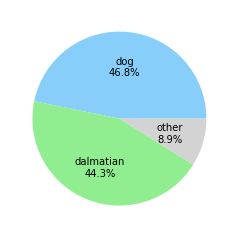

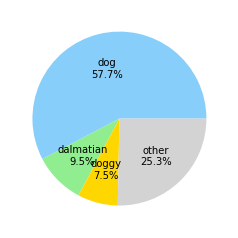

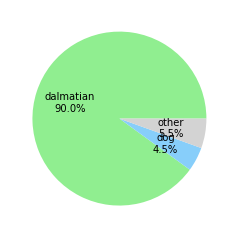

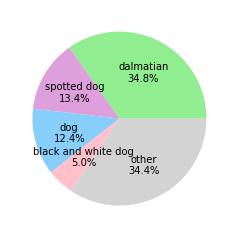

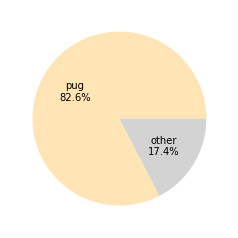

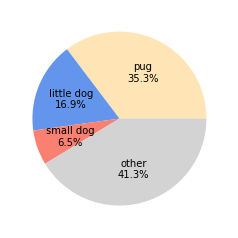

In [118]:
make_pie_plot(["dog", "dalmatian"],
              [46.8, 44.3], add_other=True)

make_pie_plot(["dog", "dalmatian", "doggy"],
              [57.7, 9.5, 7.5,], add_other=True)

make_pie_plot(["dalmatian", "dog"],
              [90, 4.5], add_other=True)

make_pie_plot(["dalmatian", "spotted dog",
               "dog", "black and white dog"],
              [34.8, 13.4, 12.4, 5], add_other=True)

make_pie_plot(["pug"],
              [82.6], add_other=True)

make_pie_plot(["pug", "little dog", "small dog"],
              [35.3, 16.9, 6.5], add_other=True)


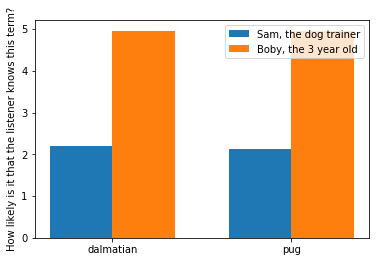

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ["dalmatian", "pug"]
sam_means = [
    np.mean([int(item) for item in dog_data["Unnamed: 15"][4:]]),
    np.mean([int(item) for item in dog_data["Unnamed: 16"][4:]])]
bobby_means = [
    np.mean([int(item) for item in dog_data["Unnamed: 13"][4:]]),
    np.mean([int(item) for item in dog_data["Unnamed: 14"][4:]])]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sam_means, width, label='Sam, the dog trainer')
rects2 = ax.bar(x + width/2, bobby_means, width, label='Boby, the 3 year old')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('How likely is it that the listener knows this term?')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [144]:
bobby_means

[4.965174129353234, 4.965174129353234]